   # <font color = 'brown'> **WEB AND SOCIAL MEDIA ANALYTICS** </font>

### **MOUNTING GDRIVE WITH COLAB**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **CHECKING FOR FILES IN DRIVE**

In [2]:
!ls drive/'MyDrive'/

 accoouunnttaannccyy
'Brands and Asins.csv'
 Capstone
'Capstone_web&social (2).ipynb'
 Cell_Phones_and_Accessories_5.csv
 CF8BAF7A-6141-4739-971F-B3BA463C646E.jpeg
'Colab Notebooks'
 data.csv
'eshwar 10th marksheet1.jpg'
 final_result_for_capstone.csv
 final_tab.xlsx
 for_tableau.xlsx
'meta_Cell_Phones_and_Accessories (1).json.gz'
'meta_Cell_Phones_and_Accessories (2).json.gz'
 meta_Cell_Phones_and_Accessories.json
 meta_Cell_Phones_and_Accessories.json.gz
 negative_corpus.xlsx
 neg_words.txt
 phone_data_final.csv
 phone_reviews.csv
 Photos
 positive_corpus.xlsx
 pos_words.txt
 review.csv
 review_sentiment.csv
 Screenshot_2018-05-17-20-23-29.png
 Screenshot_20211011-210447__01.jpg
 stop_words_long.txt
 Untitled0.ipynb
'Updated resume .pdf'
 Web_and_social_media_analytics


### **IMPORTING LIBRARIES**

In [3]:
import pandas as pd
import numpy as np

### The following data sets are available
1.   meta data of type .json
2.   phone data of type .csv

The meta data holds information from sellers point of view and the phone data holds user information.
We begin by unzipping the meta data file and extracting its content to a list



## **READING THE DATA**



In [4]:
# Reading the meta data
# importing libraries

import gzip
import shutil

#Path to the meta data zip file 'meta_cell_phones_and_Accessories' is the folder name under 'My Drive'
path1 = '/content/drive/MyDrive/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file in the Colab environment
path2 = '/content/meta_Cell_Phones_and_Accessories.json'

# Unzipping the meta data file to the Colab environment
with gzip.open(path1, 'rb') as f_in:
    with open(path2, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [5]:
# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
    for line in f:
        phonemetadata.append(json.loads(line))

In [6]:
# Getting the number of entries in the phonemetadata list
len(phonemetadata)

590071

In [7]:
#converting the list phonemetadata into a data frame
df_meta=pd.DataFrame(phonemetadata)

#creating new .csv file for meta
df_meta.to_csv('/content/drive/MyDrive/meta.csv')

In [8]:
#reading meta.csv file
df_meta=pd.read_csv('/content/drive/MyDrive/meta.csv')

/tmp/ipython-input-4072298366.py:2: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_meta=pd.read_csv('/content/drive/MyDrive/meta.csv')


In [9]:
#Reading the .csv file of the phone data into a dataframe

df_phonedata = pd.read_csv('/content/drive/MyDrive/Cell_Phones_and_Accessories_5.csv')

/tmp/ipython-input-1802677898.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_phonedata = pd.read_csv('/content/drive/MyDrive/Cell_Phones_and_Accessories_5.csv')


In [10]:
# Checking for null values
print(df_meta.isnull().sum())
print(df_phonedata.isnull().sum())

# Filling missing numerical values (e.g., 'price') with median, and categorical values with 'Unknown'
df_meta['price'] = pd.to_numeric(df_meta['price'].str.replace('$',''), errors='coerce')
df_meta['price'].fillna(df_meta['price'].median(), inplace=True)
df_meta['brand'].fillna('Unknown', inplace=True)
df_meta['category'].fillna('Unknown', inplace=True)

# Filling missing text columns
df_phonedata['reviewText'].fillna('', inplace=True)
df_phonedata['summary'].fillna('', inplace=True)


Unnamed: 0           0
category             0
tech1           583486
description          0
fit             590028
title                9
also_buy             0
image                0
tech2           589840
brand            12800
feature              0
rank                 0
also_view            0
details              0
main_cat          3386
similar_item    539140
date            544191
price           462507
asin                 0
dtype: int64
overall                   0
verified                  0
reviewerID                0
asin                      0
style                523196
reviewerName            202
reviewText              830
summary                 539
unixReviewTime            0
vote                1036403
image               1101330
review_sentiment          0
dtype: int64


/tmp/ipython-input-3718491214.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_meta['price'].fillna(df_meta['price'].median(), inplace=True)
/tmp/ipython-input-3718491214.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [11]:
# Removing duplicate rows
df_meta.drop_duplicates(inplace=True)
df_phonedata.drop_duplicates(inplace=True)


In [12]:
# Lowercasing and stripping whitespace in text columns
df_phonedata['reviewText'] = df_phonedata['reviewText'].str.lower().str.strip()
df_phonedata['summary'] = df_phonedata['summary'].str.lower().str.strip()

# Removing unwanted symbols (example for reviewText)
import re
df_phonedata['reviewText'] = df_phonedata['reviewText'].apply(lambda x: re.sub(r'[^\w\s]', '', x))


In [13]:
# Removing outliers in price
Q1 = df_meta['price'].quantile(0.25)
Q3 = df_meta['price'].quantile(0.75)
IQR = Q3 - Q1
df_meta = df_meta[(df_meta['price'] >= Q1 - 1.5 * IQR) & (df_meta['price'] <= Q3 + 1.5 * IQR)]


In [14]:
df_phonedata.head(5)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,looks even better in person be careful to not ...,can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,when you dont want to spend a whole lot of cas...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,so the case came on time i love the design im ...,its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,dont care for it gave it as a gift and they w...,case,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,i liked it because it was cute but the studs f...,cute!,1391385600,NaN,NaN,POSITIVE


## **DATA PRE-PROCESSING**



**Converting unix review time to date-time format for better observation**

In [15]:
#Transforming unixReview time to date time format in phone data
from datetime import datetime, timedelta
df_phonedata['Date&Time'] = df_phonedata['unixReviewTime'].apply(lambda d: (datetime.fromtimestamp(d) - timedelta(hours=2)).strftime('%Y-%m-%d'))


In [16]:
df_phonedata.head(2)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,looks even better in person be careful to not ...,can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE,2014-08-03
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,when you dont want to spend a whole lot of cas...,1,1392163200,NaN,NaN,POSITIVE,2014-02-11


In [17]:
df_phonedata.info() #checking for dataset info

<class 'pandas.core.frame.DataFrame'>
Index: 1124986 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1124986 non-null  float64
 1   verified          1124986 non-null  bool   
 2   reviewerID        1124986 non-null  object 
 3   asin              1124986 non-null  object 
 4   style             604372 non-null   object 
 5   reviewerName      1124784 non-null  object 
 6   reviewText        1124986 non-null  object 
 7   summary           1124986 non-null  object 
 8   unixReviewTime    1124986 non-null  int64  
 9   vote              91533 non-null    object 
 10  image             27085 non-null    object 
 11  review_sentiment  1124986 non-null  object 
 12  Date&Time         1124986 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(10)
memory usage: 112.7+ MB


In [18]:
df_phonedata.isnull().sum() #checking for null values

,0
overall,0
verified,0
reviewerID,0
asin,0
style,520614
reviewerName,202
reviewText,0
summary,0
unixReviewTime,0
vote,1033453


In [19]:
df_phonedata=df_phonedata[~df_phonedata['style'].isnull()]

In [20]:
df_phonedata.isnull().sum()

,0
overall,0
verified,0
reviewerID,0
asin,0
style,0
reviewerName,109
reviewText,0
summary,0
unixReviewTime,0
vote,556599


In [21]:
df_phonedata.drop(['vote','image','unixReviewTime'], axis = 1, inplace = True) #dropping the columns with more null values

In [22]:
df_phonedata.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,looks even better in person be careful to not ...,can't stop won't stop looking at it,POSITIVE,2014-08-03
226,5.0,True,A1TNHWAM2GJ08G,961301375X,{'Color:': ' White'},P. Latella,this charger is amazing fantastic long cord an...,perfect works great,POSITIVE,2014-02-10
227,5.0,True,AXGPQOWI0CF39,961301375X,{'Color:': ' White'},TimB.,i am very satisfied with this product it came ...,very nice looking item!,POSITIVE,2014-01-31


In [23]:
df_phonedata.shape

(604372, 10)

In [24]:
df_phonedata.describe()

,overall
count,604372.000000
mean,4.258055
std,1.198397
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [25]:
df_meta.head(3)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,0,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,Trollies Sing a Long Party VHS,[],[],NaN,Unknown,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,NaN,NaN,8.4,6303195164
1,1,"['Cell Phones & Accessories', 'Accessories', '...",NaN,[],NaN,La Pura VHS,[],[],NaN,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,NaN,NaN,8.4,630524412X
2,2,"['Cell Phones & Accessories', 'Cases, Holsters...",NaN,"['New items to give you a new good mood, welco...",NaN,Leopard Thanksgiving Easter PC Black Case for ...,[],[],NaN,Unknown,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,NaN,NaN,8.4,6310200240


In [26]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465534 entries, 0 to 590070
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    465534 non-null  int64  
 1   category      465534 non-null  object 
 2   tech1         4635 non-null    object 
 3   description   465534 non-null  object 
 4   fit           38 non-null      object 
 5   title         465528 non-null  object 
 6   also_buy      465534 non-null  object 
 7   image         465534 non-null  object 
 8   tech2         148 non-null     object 
 9   brand         465534 non-null  object 
 10  feature       465534 non-null  object 
 11  rank          465534 non-null  object 
 12  also_view     465534 non-null  object 
 13  details       465534 non-null  object 
 14  main_cat      462484 non-null  object 
 15  similar_item  12512 non-null   object 
 16  date          36287 non-null   object 
 17  price         465534 non-null  float64
 18  asin     

In [27]:
df_meta.shape

(465534, 19)

In [28]:
df_meta.describe()

,Unnamed: 0,price
count,465534.000000,4.655340e+05
mean,286702.235276,8.400000e+00
std,169643.370372,6.375352e-11
min,0.000000,8.400000e+00
25%,139188.250000,8.400000e+00
50%,283212.500000,8.400000e+00
75%,432200.750000,8.400000e+00
max,590070.000000,8.400000e+00


In [29]:
df_meta.price.value_counts()

,count
price,
8.4,465534


In [30]:
df_meta.similar_item.value_counts()

similar_item
class="a-bordered a-horizontal-stripes  a-spacing-extra-large a-size-base comparison_table">\n\n\n\n            \n            \n            \n            \n            \n            <tr class="comparison_table_image_row">\n                <td class="comparison_table_first_col"></td>\n\n\n                <th class="comparison_image_title_cell" role="columnheader">\n                    <div class="a-row a-spacing-top-micro">\n                        <center>\n                             <img alt="Nokia 3310 Blue Nokia" src="https://images-na.ssl-images-amazon.com/images/I/416Q02GR0ZL._SL500_AC_SS350_.jpg" id="comparison_image">\n                        </center>\n                    </div>\n                    <div class="a-row a-spacing-top-small">\n                        <div id="comparison_title" class="a-section a-spacing-none">\n                            <span aria-hidden="true" class="a-size-base a-color-base a-text-bold">\n                                This item\n                            </span>\n                            <span aria-hidden="true" class="a-size-base a-color-base">Nokia 3310 Blue Nokia</span>\n                        </div>\n                        \n                        \n                    </div>\n                </th>\n\n\n                \n                    <th class="comparison_image_title_cell comparable_item0" role="columnheader">\n                        <a class="a-link-normal" target="_self" rel="noopener" href="/dp/B075FL4H89/ref=psdc_2407749011_t1_B00005KBGR">\n                          <div class="a-row a-spacing-top-micro">\n                            <center>\n                                <img alt="" src="https://images-na.ssl-images-amazon.com/images/I/51AkFbWp4oL._SL500_AC_SS350_.jpg" aria-hidden="true" id="comparison_image0">\n                            </center>\n                          </div>\n                          <div id="comparison_title0" class="a-row a-spacing-top-small">\n                            <span class="a-size-base">Nokia 3310 3G - Unlocked Feature Phone (AT&T/T-Mobile/MetroPCS/Cricket/H2O) - 2.4" Screen - Charcoal - U.S. Warranty</span>\n                          </div>\n                        </a>\n                        \n                        \n                    </th>\n                \n                    <th class="comparison_image_title_cell comparable_item1" role="columnheader">\n                        <a class="a-link-normal" target="_self" rel="noopener" href="/dp/B07BTG3T3Y/ref=psdc_2407749011_t2_B00005KBGR">\n                          <div class="a-row a-spacing-top-micro">\n                            <center>\n                                <img alt="" src="https://images-na.ssl-images-amazon.com/images/I/41ALGyjit%2BL._SL500_AC_SS350_.jpg" aria-hidden="true" id="comparison_image1">\n                            </center>\n                          </div>\n                          <div id="comparison_title1" class="a-row a-spacing-top-small">\n                            <span class="a-size-base">Worlds Smallest Mini Mobile Phone Bluetooth Dialer Supports Dual SIM Card Blue</span>\n                          </div>\n                        </a>\n                        \n                        \n                    </th>\n                \n                    <th class="comparison_image_title_cell comparable_item2" role="columnheader">\n                        <a class="a-link-normal" target="_self" rel="noopener" href="/dp/B00O5EU7TQ/ref=psdc_2407749011_t3_B00005KBGR">\n                          <div class="a-row a-spacing-top-micro">\n                            <center>\n                                <img alt="" src="https://images-na.ssl-images-amazon.com/images/I/41QYaBs3yML._SL500_AC_SS350_.jpg" aria-hidden="true" id="comparison_image2">\n                            </center>\n                          </div>\n                          <div id="comparison_title2" class="a-row a-spacing-top-small">\n    

In [31]:
#dropping duplicates in ASIN

df_meta.drop_duplicates(subset='asin',inplace=True)

In [32]:
mask=df_meta["category"].apply(lambda x:x[31:35]=="Cell")

In [33]:
df_meta=df_meta[mask]
df_meta.head(2)

,Unnamed: 0,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
36,36,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,"['ICE CENIOR *SENIOR PHONE*, QUAD BAND Super b...",NaN,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],['https://images-na.ssl-images-amazon.com/imag...,NaN,Ice,"['2G NETWORK, Quad Band: GSM 850/900/1800/1900...","['>#6,356,920 in Cell Phones & Accessories (Se...",[],{},Cell Phones & Accessories,NaN,NaN,8.4,8050110508
1274,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",NaN,['Standard package: 1 x original phone 1 x Qua...,NaN,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,NaN,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",8.4,B00005KBGR


In [34]:
df_meta.isnull().sum()

,0
Unnamed: 0,0
category,0
tech1,8068
description,0
fit,8096
title,0
also_buy,0
image,0
tech2,8088
brand,0


In [35]:
df_meta.drop(['tech1','tech2','fit','date'], axis = 1, inplace = True) #dropping columns with null values in meta

In [36]:
df_meta1=df_meta[~df_meta['price'].isna()] #checking for null

In [37]:
df_meta1=df_meta1[~df_meta1['similar_item'].isna()]

In [38]:
df_meta1=df_meta1[~df_meta1['brand'].isna()]

In [39]:
df_meta1.to_csv('/content/drive/MyDrive/data.csv')

In [40]:
df_meta=pd.read_csv('/content/drive/MyDrive/data.csv')
df_meta.head(2)

,Unnamed: 0.1,Unnamed: 0,category,description,title,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price,asin
0,1274,1274,"['Cell Phones & Accessories', 'Cell Phones', '...",['Standard package: 1 x original phone 1 x Qua...,Nokia 3310 Blue Nokia,"['B075FL4H89', 'B00R25GJJW']",['https://images-na.ssl-images-amazon.com/imag...,Nokia,"['GSM 900/1800', 'Simple and elegant', 'Classi...","['>#32,759 in Electronics (See Top 100 in Elec...","['B075FL4H89', 'B075FKZMR2', 'B00TLWTJLO', 'B0...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...",8.4,B00005KBGR
1,2576,2576,"['Cell Phones & Accessories', 'Cell Phones', '...","['The latest phone features, like an integrate...",T-MOBILE SIDEKICK II,[],['https://images-na.ssl-images-amazon.com/imag...,Unknown,[],"['>#3,090,469 in Cell Phones & Accessories (Se...","['B00NSRC4Y2', 'B00J1SMJ06', 'B00J7ZKSPQ', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",8.4,B00063DKVC


**Merging datasets**

In [41]:
#merging the meta and phonedata datasets

reviews = pd.merge(df_phonedata, df_meta, how="inner", on=["asin"])

In [42]:
reviews.head(3)

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,Date&Time,...,also_buy,image,brand,feature,rank,also_view,details,main_cat,similar_item,price
0,5.0,True,A1LFAMJJM87RSG,B000W8RP3K,{'Color:': ' Silver'},Gayle Ledyard,this was a gift for my husband who does not wa...,great phone,POSITIVE,2013-02-06,...,[],['https://images-na.ssl-images-amazon.com/imag...,Motorola,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",8.4
1,4.0,True,AEYUHCDXPEGC2,B000W8RP3K,{'Color:': ' Silver'},mark4348,works great,four stars,POSITIVE,2015-08-08,...,[],['https://images-na.ssl-images-amazon.com/imag...,Motorola,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",8.4
2,1.0,True,A14AQLOUQ6JUDZ,B000W8RP3K,{'Color:': ' Silver'},noemi,not the original one very bad product to fragi...,very bad product. to fragile,NEGATIVE,2015-01-28,...,[],['https://images-na.ssl-images-amazon.com/imag...,Motorola,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",8.4


In [43]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10536 entries, 0 to 10535
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   overall           10536 non-null  float64
 1   verified          10536 non-null  bool   
 2   reviewerID        10536 non-null  object 
 3   asin              10536 non-null  object 
 4   style             10536 non-null  object 
 5   reviewerName      10536 non-null  object 
 6   reviewText        10536 non-null  object 
 7   summary           10536 non-null  object 
 8   review_sentiment  10536 non-null  object 
 9   Date&Time         10536 non-null  object 
 10  Unnamed: 0.1      10536 non-null  int64  
 11  Unnamed: 0        10536 non-null  int64  
 12  category          10536 non-null  object 
 13  description       10536 non-null  object 
 14  title             10536 non-null  object 
 15  also_buy          10536 non-null  object 
 16  image             10536 non-null  object

In [44]:
reviews.to_csv('/content/drive/MyDrive/review.csv') #creating new .csv for merged data

In [45]:
df=pd.read_csv('/content/drive/MyDrive/review.csv')

In [46]:
df.dtypes

,0
Unnamed: 0.2,int64
overall,float64
verified,bool
reviewerID,object
asin,object
style,object
reviewerName,object
reviewText,object
summary,object
review_sentiment,object


In [47]:
df1=df

In [48]:
pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 2.5 MB/s eta 0:00:00


In [49]:
df1.to_excel("/content/drive/MyDrive/for_tableau.xlsx", engine='xlsxwriter') #saving it as xlsx for tableau analysis

In [50]:
# Changes the overall category to categorical from numerical for easier visualizations
df["classes"] = df["overall"]
df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df["classes"].unique()

/tmp/ipython-input-1236685374.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)


array(['positive', 'negative', 'neutral'], dtype=object)

## **TEXT ANALYTICS**

In [51]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
import re
import string
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/My Drive/stop_words_long.txt')]

In [53]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)

  # dropping uneccesary columns for the analysis
  df = df.drop(labels=['Unnamed: 0', 'verified','asin' ,'style','reviewerName',  'description','title', 'main_cat' ],axis=1)

  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['reviewText'])
  return df


In [54]:
# splits review rating into different classes, say positive(2), neutral(1) and negative(0).
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1
    return 0

In [55]:
df=clean_dataframe(df)

In [56]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [57]:
def text_process(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))
  # stemming
  stemmer = PorterStemmer()
  # stop words are the words like "the, I, our etc"
  words = stopwords.words("english")
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [58]:
df['reviewText']=df['reviewText'].astype('str')

In [59]:
df=text_process(df)

In [60]:
# Dropping null values to have a cleaner dataset

df = df.dropna(subset=['cleaned_reviews'])

In [61]:
df.to_excel("/content/drive/MyDrive/final_tab.xlsx", engine='xlsxwriter') #xslx file for final tableau analysis

In [62]:
df.head(3)

,Unnamed: 0.2,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0.1,category,also_buy,...,brand,feature,rank,also_view,details,similar_item,price,classes,y,cleaned_reviews
0,0,5.0,A1LFAMJJM87RSG,this was a gift for my husband who does not wa...,great phone,POSITIVE,2013-02-06,7684,"['Cell Phones & Accessories', 'Cell Phones', '...",[],...,Motorola,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},"class=""a-bordered a-horizontal-stripes a-spa...",8.4,positive,2,gift husband want text simpli receiv make call...
1,1,4.0,AEYUHCDXPEGC2,works great,four stars,POSITIVE,2015-08-08,7684,"['Cell Phones & Accessories', 'Cell Phones', '...",[],...,Motorola,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},"class=""a-bordered a-horizontal-stripes a-spa...",8.4,positive,2,work great
2,2,1.0,A14AQLOUQ6JUDZ,not the original one very bad product to fragi...,very bad product. to fragile,NEGATIVE,2015-01-28,7684,"['Cell Phones & Accessories', 'Cell Phones', '...",[],...,Motorola,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},"class=""a-bordered a-horizontal-stripes a-spa...",8.4,negative,0,origin one bad product fragil broken alreadi l...


### **Distribution of sentiment analysis across the dataset**

In [63]:
#importing necessary visualisation libraries

import torch #the pytorch library, used for modeling and formatting our data to be compatible in a pytorch environment
import pandas as pd #for dataframe reading, cleaning functions
from tqdm.notebook import tqdm #used as a progress bar

# Importing necessary libraries for basic visualization as well as word clouds
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

# Using textblob to generate sentiment for easy visualization
from textblob import TextBlob

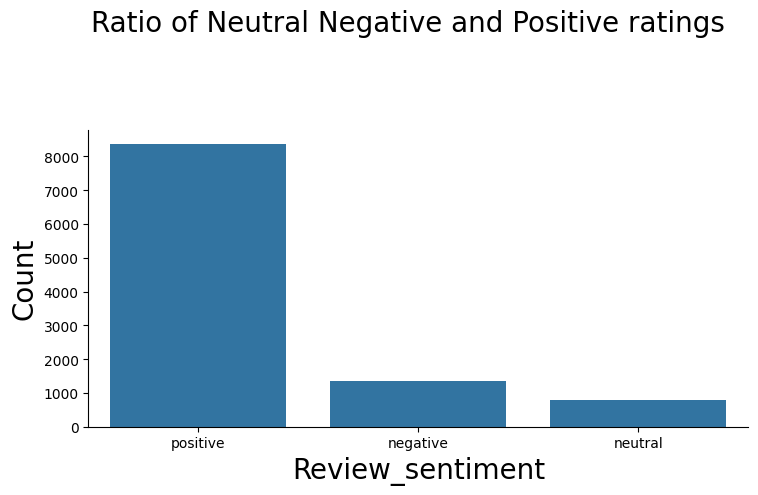

In [64]:
#Distribution of sentiment across the dataset
# Distribution of sentiment class
fig, axes = plt.subplots(1, figsize=(8,5))
fig.suptitle("Ratio of Neutral Negative and Positive ratings", fontsize = 20)
plt.tight_layout(pad = 3.5)
sns.countplot(x = "classes", data = df)
axes.set_xlabel("Review_sentiment", fontsize = 20)
axes.set_ylabel("Count", fontsize = 20)
sns.despine()

In [65]:
# Percentage of neutral, negative, positive words in train and test data
def pert_count(data, category):
    return (len(data[data["classes"] == category])/len(data)) * 100
print(f"Percentage of neutral words in train --> {pert_count(df, 'neutral')} %")
print(f"Percentage of negative words in train --> {pert_count(df, 'negative')} %")
print(f"Percentage of positive words in train --> {pert_count(df, 'positive')} %")

Percentage of neutral words in train --> 7.6258309591642925 %
Percentage of negative words in train --> 12.924976258309592 %
Percentage of positive words in train --> 79.44919278252611 %


**Words and word clouds**

In [66]:
# Most repeated words in reviews
stopwords = set(STOPWORDS)
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (8.5, 8.5))
    plt.axis("on")
    if title:
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.35)
    plt.imshow(wordcloud)
    plt.show()

In [67]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df[df["classes"] == "neutral"]["cleaned_reviews"]
neg=df[df["classes"] == "negative"]["cleaned_reviews"]
pos=df[df["classes"] == "positive"]["cleaned_reviews"]

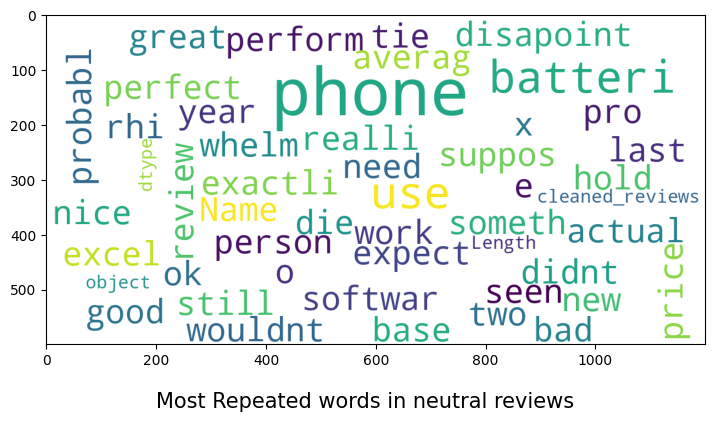

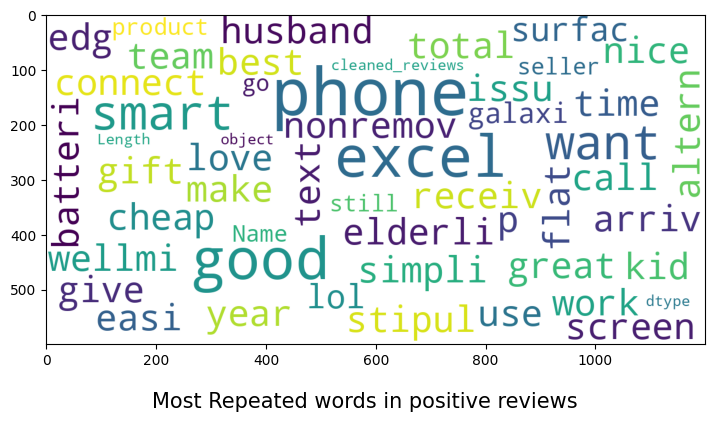

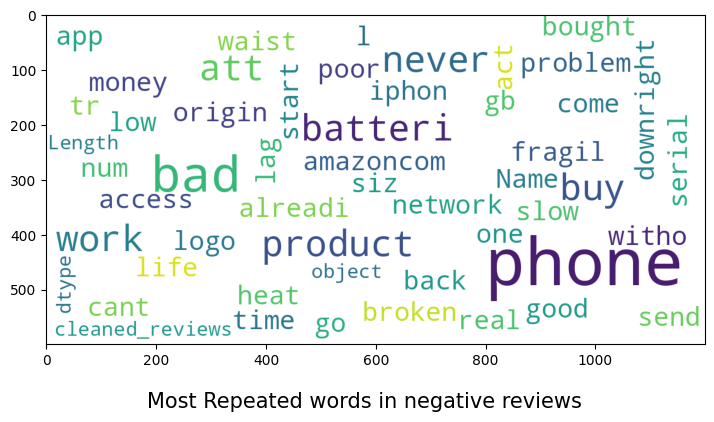

In [68]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

In [69]:
# Function for bigram
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]# apply function above

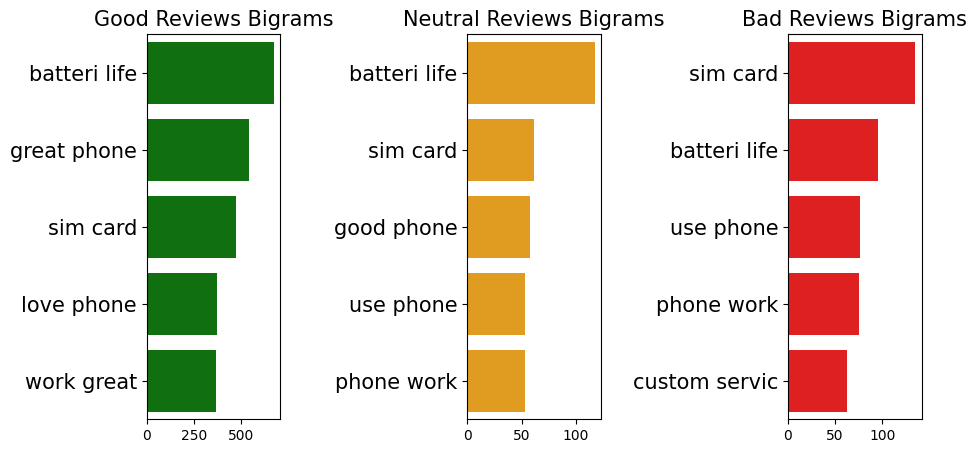

In [70]:
# create a function for bigram plots
def n_gram_plot(data,title,color):
    x=[x[0] for x in data]
    y=[x[1] for x in data]
    sns.barplot(x=y,y=x,color='{}'.format(color))
    plt.title('{} Reviews Bigrams'.format(title),fontsize=15)
    plt.yticks(rotation=0,fontsize=15)

common_words_good = get_top_n_bigram(pos, 5)
common_words_neutral= get_top_n_bigram(neu, 5)
common_words_bad= get_top_n_bigram(neg, 5)

# bigram plot using function above
plt.figure(figsize=(10,5))
# good reviews bigrams
plt.subplot(151)
n_gram_plot(common_words_good,'Good','green')
#=============================================
#neutral reviews bigrams
plt.subplot(153)
n_gram_plot(common_words_neutral,'Neutral','orange')
#=============================================
#bad reviews bigrams
plt.subplot(155)
n_gram_plot(common_words_bad,'Bad','red')
plt.show()

The above Bigrams shows the sentiment review analysis of all aspects of the brands

In [71]:
# calculating sentiment polarity using external libraries
df['sentiment'] = df['cleaned_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df.head(3)

,Unnamed: 0.2,overall,reviewerID,reviewText,summary,review_sentiment,Date&Time,Unnamed: 0.1,category,also_buy,...,feature,rank,also_view,details,similar_item,price,classes,y,cleaned_reviews,sentiment
0,0,5.0,A1LFAMJJM87RSG,this was a gift for my husband who does not wa...,great phone,POSITIVE,2013-02-06,7684,"['Cell Phones & Accessories', 'Cell Phones', '...",[],...,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},"class=""a-bordered a-horizontal-stripes a-spa...",8.4,positive,2,gift husband want text simpli receiv make call...,0.225000
1,1,4.0,AEYUHCDXPEGC2,works great,four stars,POSITIVE,2015-08-08,7684,"['Cell Phones & Accessories', 'Cell Phones', '...",[],...,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},"class=""a-bordered a-horizontal-stripes a-spa...",8.4,positive,2,work great,0.800000
2,2,1.0,A14AQLOUQ6JUDZ,not the original one very bad product to fragi...,very bad product. to fragile,NEGATIVE,2015-01-28,7684,"['Cell Phones & Accessories', 'Cell Phones', '...",[],...,['This product has been carefully audited and ...,"['>#544,961 in Cell Phones & Accessories (See ...","['B0009FCAJA', 'B005LRBF88', 'B002UHS0UI', 'B0...",{},"class=""a-bordered a-horizontal-stripes a-spa...",8.4,negative,0,origin one bad product fragil broken alreadi l...,-0.393333


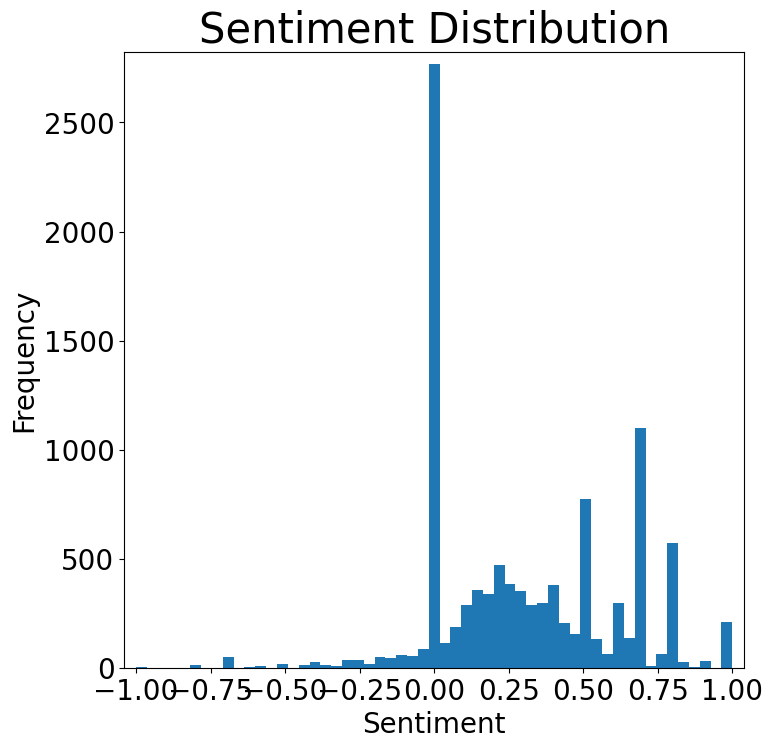

In [72]:
#Barchart using to visualize the sentiment distribution generated above
plt.figure(figsize=(8,8))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.yticks(fontsize=20)
plt.hist(df['sentiment'], bins=55)
plt.title('Sentiment Distribution', fontsize=30)
plt.show()


We can conclude that there's more reviews that look neutral exist in our dataset than there are positive or negative reviews. We also see that people tend to put in reviews only when its positive or when its neutral and they barely bother to put up a review when its a really bad product.

**Correlation heatmap to analyse the dependence between review length and sentiment**


It is a known fact that individuals tend to rant more about a product than they would praise a product. The following correlation heatmap further proves that face, there's a negative correlation between review length and the sendiment indicating negative reviews tend to be longer than positive or neutral ones.

<Axes: >

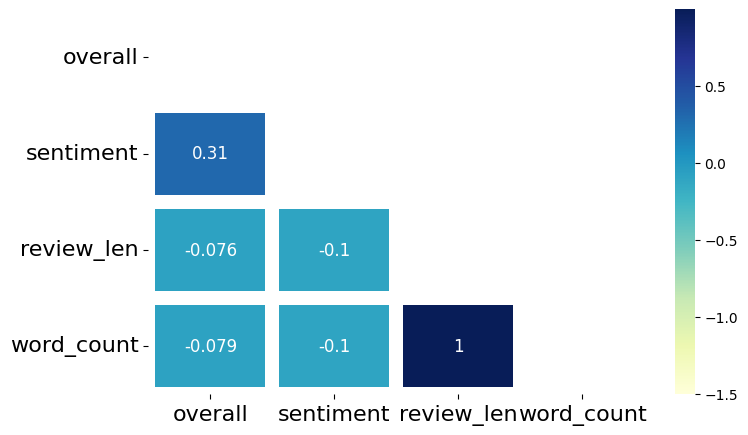

In [73]:
# Heatmap from overall rating, review length, sentiment and word count

# calculating word count and review length
df['word_count'] = df["reviewText"].apply(lambda x: len(str(x).split(" ")))
df['review_len'] =df["reviewText"].apply(lambda x: len(str(x)))

# visualising the heatmap
correlation = df[['overall','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8,5))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
sns.heatmap(correlation, cmap='YlGnBu', annot=True, annot_kws={"size": 12}, linewidths=10, vmin=-1.5, mask=mask)

In [74]:
#Libraries for Tokenization
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
#Libraries to implement Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
#Libraries to implement and optimize Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
#To create Pipelines and select best feautures before passing through the model
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
#Pre-processing and NLP libraries
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")
import nltk
import re
import string
#Visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
#Tokenization methods to break down text into tokens(words)
#Using TF-IDF with ngram range of (1,1)
tfidf_vectorizer = TfidfVectorizer(min_df= 3, sublinear_tf=True, norm='l2', ngram_range=(1,1))
#Using Bag of Words with ngram range of (1,1)
counter_vectorizer = CountVectorizer(ngram_range=(1,1))

In [76]:
#Seperating test-train with standard 80-20 split
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]
X_train_class = df_train["cleaned_reviews"]
Y_train_class = df_train["y"]
X_test_class = df_test["cleaned_reviews"]
Y_test_class = df_test["y"]

In [77]:
#Creating Model Pipelines for various models with the pattern [Tokenizer Method][SelectKBest features][Model+Paramaters]
text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier()),])
#text_clf_classifier1 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=1200)),('clf', RandomForestClassifier(criterion='entropy')),])
text_clf_classifier2 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=11)),])
text_clf_classifier4 = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', BernoulliNB(alpha=11)),])

In [78]:
#Function to execute and run Model Pipelines and display Model Paramaters used along with Accuracy
def run_model(text_clf_classifier):
  print(text_clf_classifier)
  classifier_model = text_clf_classifier.fit(X_train_class,Y_train_class)
  print(np.mean(classifier_model.predict(X_test_class)== Y_test_class))


**Random Forest Classifier Parameters tuned**

*   No of estimators - No. of trees - 100,
*   Information Gain criteria - Entropy & Gini Index : Gini Index gives better accuracy.
*  Cost complexity pruning paramter - 0.0(No pruning)

In [79]:
print("Random Forest Classifier - Count Vectorizer:")
run_model(text_clf_classifier1)

Random Forest Classifier - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=1200,
                             score_func=<function chi2 at 0x7dfb3fbc8ea0>)),
                ('clf', RandomForestClassifier())])
0.8314606741573034



**Naive Bayes methods**

* Learning Rate Variants : 0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15
* Best Results were given by alpha=11 for Counter Vectorizer for Tokenization

In [80]:
#Running Multinomial Naive Bayes - Counter Vertorizer for variety of learning rates to best estimate hyperparameter value
x_alpha=[0.0001,0.001,0.01,0.1,1,3,5,8,11,13,15]
y_accuracy=[]
for x in x_alpha:
  clf = Pipeline([('vect', counter_vectorizer),('chi',  SelectKBest(chi2, k=2890)),('clf', MultinomialNB(alpha=x)),])
  classifier_model = clf.fit(X_train_class,Y_train_class)
  y_accuracy.append(np.mean(classifier_model.predict(X_test_class)== Y_test_class))

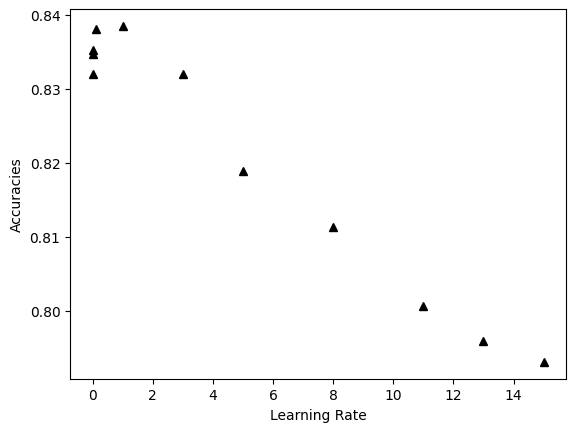

[np.float64(0.8319288389513109), np.float64(0.8347378277153558), np.float64(0.8352059925093633), np.float64(0.8380149812734082), np.float64(0.8384831460674157), np.float64(0.8319288389513109), np.float64(0.8188202247191011), np.float64(0.8113295880149812), np.float64(0.800561797752809), np.float64(0.795880149812734), np.float64(0.7930711610486891)]


In [81]:
plt.plot(x_alpha,y_accuracy,'^k')
plt.ylabel('Accuracies')
plt.xlabel('Learning Rate')
plt.show()
print(y_accuracy)

In [82]:
print("Multinomial Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier2)

Multinomial Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7dfb3fbc8ea0>)),
                ('clf', MultinomialNB(alpha=11))])
0.800561797752809


In [83]:
print("Bernoulli Naive Bayes - Count Vectorizer:")
run_model(text_clf_classifier4)

Bernoulli Naive Bayes - Count Vectorizer:
Pipeline(steps=[('vect', CountVectorizer()),
                ('chi',
                 SelectKBest(k=2890,
                             score_func=<function chi2 at 0x7dfb3fbc8ea0>)),
                ('clf', BernoulliNB(alpha=11))])
0.7635767790262172


In [84]:
def prediction(review):
  prediction_df = pd.DataFrame([[review,0]],columns = ["reviewText","y"])
  prediction_df = text_process(prediction_df)
  classifier_prediction = classifier_model.predict(prediction_df["cleaned_reviews"])
  return classifier_prediction[0]

In [85]:
prediction("works good, viewing angle critical for good picture,the size was perfect for the location")

np.int64(2)

In [86]:
df.to_csv('/content/drive/MyDrive/final_result_for_capstone.csv')